In [8]:
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import cv2

<IPython.core.display.Javascript object>


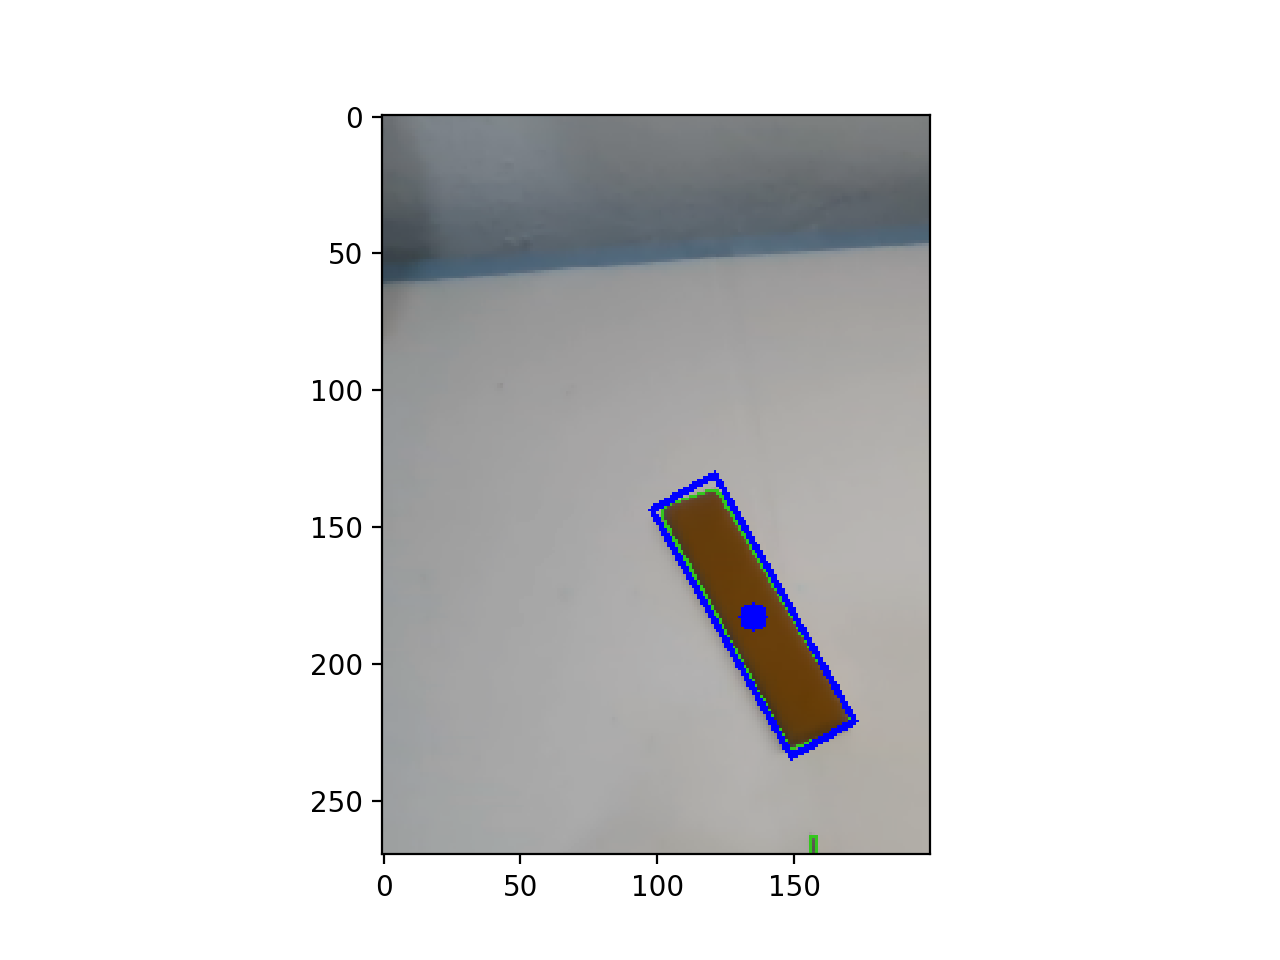

In [56]:
%matplotlib notebook
cv_image = cv2.imread('./train/blue/blue1.png')
edged = cv2.Canny(cv_image, 140, 300)

circle_list = []

_,list_contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = np.array(list_contours)
result = cv2.drawContours(cv_image, contours, -1, (52, 198, 30))

area_max = 0
box_list = []
bound = np.array([0,0,0,0]).reshape(1,-1)
for c in contours:
    #Approximating contour shape
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.05 * peri, True)
    
    x, y, w, h = cv2.boundingRect(c)
    rect = cv2.minAreaRect(c)
    area = (w*h)

    #Bounding box supression
    candidate = np.array([x,y,x+w,y+h]).reshape(1,-1)
    difference = np.sum(np.abs(bound - candidate)**2,axis=-1)**(1./2)
    min_difference = np.min(difference)

    if(min_difference > 5):
        bound = np.append(bound,candidate,0)
        if(w > 10 and h > 10 and w <200 and h<200 and len(approx) ==4 ):
            box = cv2.boxPoints(rect)
            circle_list.append(np.array([np.average(box[:,0]),np.average(box[:,1])]))
            box_list.append(np.int0(box))
            area_max = area

pts = box_list[0]

if(area_max > 0):
    image_used = result
    [cv2.drawContours(image_used,[boxes],0,(0,0,255),2) for boxes in box_list]
    [cv2.circle(image_used,(circle[0],circle[1]), 5, (0,0,255), -1) for circle in circle_list]

#     cv2.imshow("realsense_window", image_used)
plt.figure()
plt.imshow(image_used)
plt.show()

In [61]:
pts = box_list[0]
print(pts)
p1 = Point((111,200))
poly = Polygon(pts)
p1 = np.min(pts,0)
p2 = np.max(pts,0)
print(p1,p2)
xx = np.arange(p1[0], p2[0])
yy = np.linspace(p1[1],p2[1])
xv, yv = np.meshgrid(xx, yy)
for x,y in zip(xv.reshape(-1),yv.reshape(-1)):
    p = Point((x,y))
    

[[149 234]
 [ 98 144]
 [121 131]
 [172 221]]
[ 98 131] [172 234]
